In [52]:
import matplotlib.pyplot as plt
import spacy

from datasets import load_dataset

dataset = load_dataset("rajpurkar/squad", split='train')
dataset = dataset.to_pandas()

nlp = spacy.load("en_core_web_sm")


<Axes: ylabel='Frequency'>

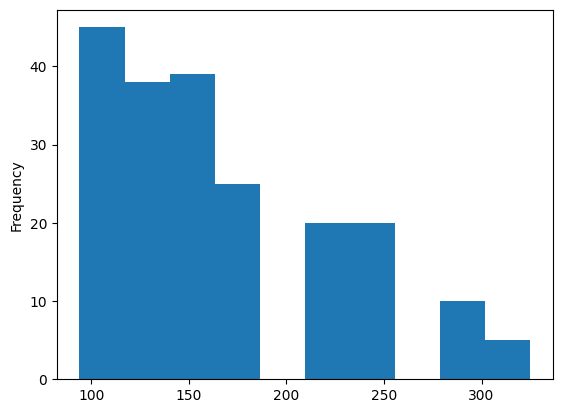

In [53]:
dataset["context_length"]=None
for i, element in enumerate(dataset.itertuples()):
    doc = nlp(element.context)
    dataset.loc[i, "context_length"] = len(doc)
    if i>200:
        break

dataset["context_length"].plot(kind="hist")


<Axes: ylabel='Frequency'>

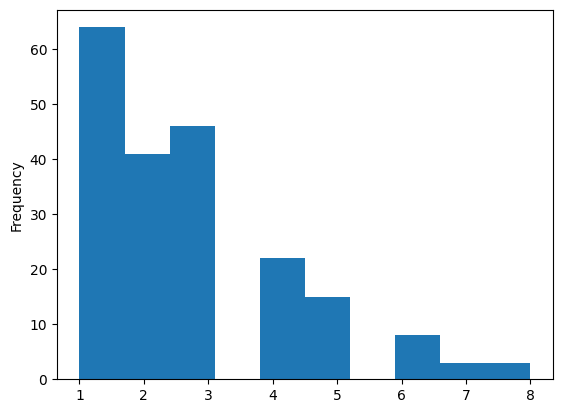

In [54]:
dataset["answer_length"]=None
for i, element in enumerate(dataset.itertuples()):
    doc = nlp(element.answers["text"][0])
    dataset.loc[i, "answer_length"] = len(doc)
    if i>200:
        break

dataset["answer_length"].plot(kind="hist")

<Axes: xlabel='context_length'>

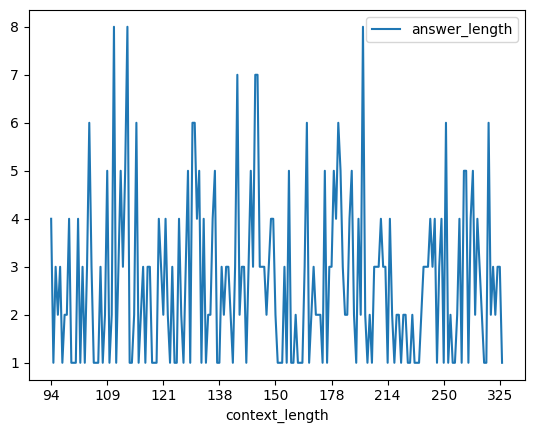

In [55]:
dataset.sort_values("context_length").plot("context_length", "answer_length")

## Loi de Zipf

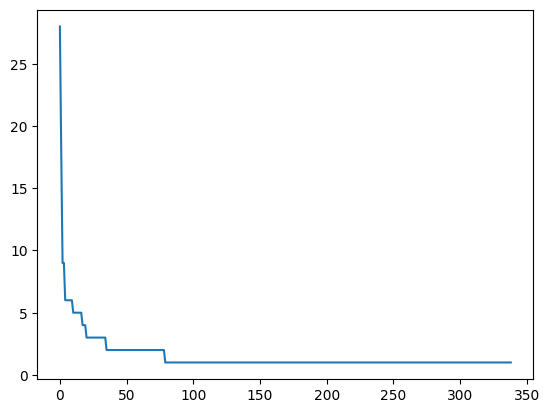

In [81]:
from collections import Counter
concat_context = []
for i, element in enumerate(dataset.itertuples()):
    doc = nlp(element.answers["text"][0])
    for token in doc:
        concat_context.append(str(token))
    if i>200:
        break

concat_context_counter = Counter(concat_context)
plt.plot(sorted(concat_context_counter.values(), reverse=True))